# Black Body Radiation
Authors:  A + B

In [3]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

# Introduction


some facts about Black Body radiation

# Wien's displacement law

/Users/jens/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


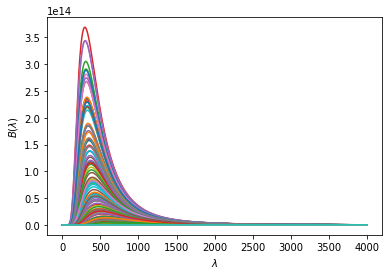

In [44]:
h = 6.626e-34
c = 3.0e+8
k = 1.38e-23

def planck(wav, T):
    a = 2.0*h*c**2
    b = h*c/(wav*k*T)
    intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) )
    return intensity

# generate x-axis in increments from 1nm to 3 micrometer in 1 nm increments
# starting at 1 nm to avoid wav = 0, which would result in division by zero.
wavelengths = np.arange(1e-9, 4e-6, 1e-10) 

#generate 10 temperatures

intensity=[]
Temp=[]
ntemp=200
for i in range(ntemp):
    T = np.random.uniform(1000,10000,1)[0]
    B = planck(wavelengths, T)
    intensity.append(B)
    Temp.append(T)
    plt.plot(wavelengths*1e9, B) 
    plt.ylabel(r'$B(\lambda)$')
    plt.xlabel(r'$\lambda$')


# show the plot
plt.show()

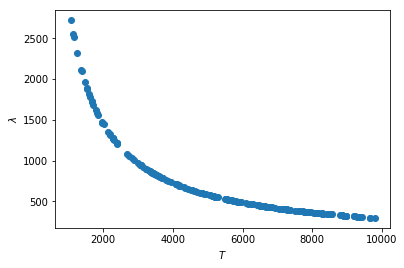

In [45]:
#get maximum
lmax=[]
Tmax=[]
for i in range(ntemp):
    l = np.argmax(intensity[i])
    lmax.append(wavelengths[l])
    Tmax.append(Temp[i])

    
plt.scatter(np.array(Tmax),np.array(lmax)*1e9)
plt.xlabel(r'$T$')
plt.ylabel(r'$\lambda$')
plt.show()